# Nearest Centroid

In deze opdracht ga je Nearest Centroid classificatie implementeren om afbeeldingen van handgeschreven getallen te leren herkennen.   
Voor informatie over de dataset, zie: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [4]:
# misc data processing imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# dataset
from sklearn.datasets import load_digits

# testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

## 1. Data laden

* Laad de digits dataset.
* Sla de data samples op onder de variabele 'X'.
* Hoeveel samples zijn er? En hoeveel features heeft elk sample?

In [5]:
X = load_digits()
samples,col=X.data.shape
print(samples)
print(col)

1797
64


* Sla de targets op onder de variabele 'y'.
* Welke unieke targets zijn er?

In [6]:
y = X.target
#np.unique(y)
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

* Verdeel de data in een train set (80%) en test set (20%).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X.data, y, test_size=0.2)
#train, test = train_test_split(X.data, test_size=0.2)
print(len(X_train))
print(len(X_test))

1437
360


In [8]:
360/1797

0.2003338898163606

## 2. Centroids berekenen

  * Bereken voor elk type digit de gemiddelde feature vector (de 'centroid').  
  Het resultaat is een matrix, genaamd `centroids`, met shape = [n_centroids, n_features].

In [9]:
centroid=np.zeros((len(np.unique(y)),col))
for i in range(10):
    centroid[i] = np.mean(X_train[y_train == i], axis=0)
 

Met onderstaande code kan één geleerde centroid gevisualiseerd worden.
* Herschrijf de code zodat alle centroids gevisualiseerd worden

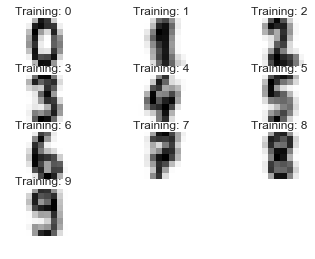

In [10]:
for index in range(len(np.unique(y))):
    plt.subplot(4, 3, index+1)
    plt.axis('off')
    plt.imshow(centroid[index].reshape(8,8), cmap=plt.cm.gray_r)
    plt.title('Training: %i' % X.target_names[index])

## 3. Nieuwe digits classificeren

  * Bereken voor elke sample in de test data, de meest dichtbijzijnde centroid door middel van de Manhattan distance.

In [11]:
manDistance = np.zeros((360))

for i, point in enumerate(X_test):
    manDistance[i]=np.argmin([sum(abs((point - centr))) for centr in centroid])
print(manDistance)

[ 1.  7.  8.  3.  2.  0.  9.  5.  1.  4.  2.  9.  7.  9.  9.  1.  7.  1.
  6.  4.  7.  2.  3.  7.  8.  2.  4.  2.  3.  4.  2.  4.  1.  7.  7.  5.
  7.  9.  4.  6.  4.  4.  5.  8.  1.  0.  6.  8.  0.  0.  1.  4.  0.  2.
  0.  6.  0.  5.  7.  6.  0.  0.  4.  8.  8.  9.  7.  5.  6.  6.  7.  0.
  7.  0.  5.  2.  1.  5.  1.  5.  1.  3.  2.  5.  8.  2.  1.  2.  6.  9.
  1.  3.  7.  7.  5.  7.  5.  6.  4.  0.  0.  7.  6.  2.  5.  3.  2.  9.
  7.  7.  7.  3.  7.  0.  4.  1.  0.  0.  7.  4.  5.  1.  8.  6.  8.  5.
  3.  0.  4.  2.  3.  8.  9.  9.  7.  9.  7.  7.  0.  1.  3.  6.  4.  3.
  1.  6.  0.  2.  6.  0.  6.  2.  4.  8.  4.  0.  7.  7.  1.  2.  5.  6.
  9.  5.  6.  2.  0.  2.  4.  9.  0.  3.  9.  5.  8.  7.  6.  7.  7.  9.
  7.  3.  2.  7.  3.  2.  3.  2.  1.  6.  0.  6.  1.  1.  8.  4.  6.  3.
  0.  5.  6.  9.  2.  4.  9.  6.  2.  4.  3.  2.  5.  9.  9.  5.  8.  3.
  5.  5.  6.  4.  9.  3.  7.  9.  5.  4.  4.  6.  3.  2.  0.  9.  7.  0.
  3.  8.  4.  6.  9.  0.  9.  0.  4.  6.  0.  9.  3

* Bereken voor elke sample in de test data, de meest dichtbijzijnde centroid door middel van de Euclidean distance.

In [12]:
from math import sqrt

eucDistance = np.zeros((360))

for i in range(len(X_test)):
    eucDistance[i]=np.argmin([sqrt(sum((X_test[i]-centroid[j])**2)) for j in range(10)])
print(eucDistance)

[ 1.  7.  8.  3.  2.  0.  9.  5.  1.  4.  2.  9.  5.  9.  9.  1.  7.  1.
  6.  4.  7.  2.  3.  7.  8.  2.  4.  2.  3.  8.  2.  4.  1.  7.  7.  5.
  7.  9.  4.  6.  5.  4.  5.  8.  1.  0.  6.  8.  0.  0.  1.  4.  0.  2.
  0.  6.  0.  5.  7.  6.  0.  0.  4.  8.  8.  9.  7.  9.  6.  6.  7.  0.
  7.  0.  5.  2.  1.  5.  1.  5.  8.  3.  8.  5.  8.  2.  1.  1.  6.  9.
  1.  3.  7.  7.  5.  7.  5.  6.  4.  0.  0.  7.  6.  2.  5.  3.  2.  9.
  7.  7.  7.  3.  7.  0.  4.  1.  0.  0.  7.  4.  5.  1.  8.  6.  8.  5.
  3.  0.  4.  2.  3.  8.  9.  9.  7.  9.  7.  7.  0.  1.  3.  6.  4.  3.
  1.  6.  0.  2.  6.  0.  6.  2.  4.  8.  4.  0.  7.  7.  1.  2.  5.  6.
  9.  5.  6.  2.  0.  2.  4.  9.  0.  1.  9.  5.  8.  7.  6.  7.  7.  9.
  7.  2.  2.  7.  3.  2.  3.  2.  1.  6.  0.  6.  1.  8.  8.  4.  6.  3.
  0.  5.  6.  9.  2.  7.  9.  6.  2.  4.  3.  2.  5.  9.  9.  5.  8.  3.
  5.  5.  6.  4.  9.  3.  7.  9.  5.  4.  4.  6.  3.  2.  8.  9.  7.  0.
  3.  8.  0.  6.  9.  0.  9.  0.  4.  6.  0.  9.  3

* Optioneel: Bereken de meest dichtbijzijnde centroids d.m.v. de $\chi^2$ distance.

In [23]:
def sommatie(matrix1,matrix2,noFeatures):
    """bereken de som van twee matrices.
    
    Parameters
    ----------
    matrix1 : array-like, shape = [n_samples, n_features]
        
    
    matrix2 : 
        array-like, shape = [n_clusters, n_features]
        
        
    noFeatures : 
        integer 
        number of features of both matrices
    """
    som=np.zeros(noFeatures)

    for k in range(noFeatures):
        som[k]=matrix1[k]+matrix2[k]
    return(som)

In [25]:
sommatie(X_test[1],centroid[1],64)

array([  0.00000000e+00,   0.00000000e+00,   2.21768707e+00,
         1.68979592e+01,   2.45714286e+01,   2.14081633e+01,
         8.06122449e+00,   0.00000000e+00,   0.00000000e+00,
         8.84353741e-02,   8.05442177e+00,   2.87346939e+01,
         2.59727891e+01,   2.36870748e+01,   1.52925170e+01,
         0.00000000e+00,   1.36054422e-02,   1.27891156e+00,
         8.41496599e+00,   1.58503401e+01,   1.41292517e+01,
         1.86802721e+01,   1.27278912e+01,   0.00000000e+00,
         6.80272109e-03,   2.27210884e+00,   1.10952381e+01,
         1.80884354e+01,   1.98775510e+01,   2.04625850e+01,
         1.53945578e+01,   0.00000000e+00,   0.00000000e+00,
         5.09523810e+00,   2.27278912e+01,   2.77006803e+01,
         2.96530612e+01,   2.18775510e+01,   5.42176871e+00,
         0.00000000e+00,   0.00000000e+00,   8.38095238e+00,
         1.70204082e+01,   1.72108844e+01,   2.73741497e+01,
         1.82312925e+01,   4.08163265e-01,   0.00000000e+00,
         0.00000000e+00,

In [34]:
(X_test[1]-centroid[1])**2

array([  0.00000000e+00,   0.00000000e+00,   4.91813596e+00,
         8.06330696e-01,   1.17551020e+01,   7.38196585e+01,
         3.52690546e+01,   0.00000000e+00,   0.00000000e+00,
         7.82081540e-03,   2.96172891e-03,   1.06622241e+01,
         3.89189689e+00,   3.98530242e+01,   1.61480124e+02,
         0.00000000e+00,   1.85108057e-04,   1.63561479e+00,
         4.11517886e+01,   1.91831922e+02,   1.99635754e+02,
         1.10205933e+01,   1.27060438e+02,   0.00000000e+00,
         4.62770142e-05,   5.16247860e+00,   5.03424036e+01,
         1.01776528e+02,   6.20558101e+01,   5.68126244e+01,
         2.13318941e+02,   0.00000000e+00,   0.00000000e+00,
         8.43764172e+00,   8.59720024e+01,   1.84841501e+01,
         5.50812162e+00,   1.02463973e+02,   2.09602018e+01,
         0.00000000e+00,   0.00000000e+00,   5.80498866e+01,
         4.87147022e+01,   1.03097783e+01,   3.91688648e-01,
         3.32779860e+01,   1.66597251e-01,   0.00000000e+00,
         0.00000000e+00,

In [44]:
chiDistance = np.zeros((360))
comp = np.zeros((64))

for i in range(len(X_test)):
    for j in range(len(centroid)):
        t=sommatie(X_test[i],centroid[j],64)
        v=(X_test[i]-centroid[j])**2
        for k in t:
            if k == 0:
                comp[j] = 0
            else:
                for w in v:
                    comp[j]=w/k
    #chiDistance[i]=np.argmin(sum(comp))
    print(i,sum(comp))
print(chiDistance)

0 3.31788749495
1 3.31788749495
2 3.31788749495
3 3.31788749495
4 3.31788749495
5 3.31788749495
6 3.31788749495
7 3.31788749495
8 3.31788749495
9 3.31788749495
10 81.8340055848
11 3.31788749495
12 3.31788749495
13 3.31788749495
14 3.31788749495
15 3.31788749495
16 3.31788749495
17 3.31788749495
18 3.31788749495
19 3.31788749495
20 3.31788749495
21 3.31788749495
22 3.31788749495
23 3.31788749495
24 3.31788749495
25 3.31788749495
26 3.31788749495
27 3.31788749495
28 3.31788749495
29 3.31788749495
30 3.31788749495
31 3.31788749495
32 3.31788749495
33 3.31788749495
34 3.31788749495
35 3.31788749495
36 3.31788749495
37 3.31788749495
38 3.31788749495
39 3.31788749495
40 3.31788749495
41 3.31788749495
42 3.31788749495
43 3.31788749495
44 3.31788749495
45 3.31788749495
46 3.31788749495
47 3.31788749495
48 3.31788749495
49 3.31788749495
50 3.31788749495
51 3.31788749495
52 3.31788749495
53 121.341694493
54 24.2062338682
55 3.31788749495
56 3.31788749495
57 3.31788749495
58 3.31788749495
59 3.31

In [36]:
comp

array([ 0.        ,  1.46938776,  1.58865248,  0.08053691,  0.        ,
        0.        ,  0.10344828,  0.        ,  0.0137931 ,  0.06206897,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

* Bereken de F1 score per target (digit) per distance measure
* Zet de F1 scores om in error scores (1 - F1 score)

Voor elke distance measure:
* Plot de errors per target in een histogram plot.
* Zet het y-as label op 'Error' en het x-as label op 'Digit'.

(Bonus punten als je de bars combineert in 1 plaatje)